In [244]:
import pandas as pd

In [245]:
daily_df = pd.read_csv("../raw_data/data/BDI/cleaned_daily_BDI.csv")
weekly_df = pd.read_csv("../raw_data/data/BDI/cleaned_weekly_BDI.csv")

In [246]:
days = pd.date_range(start='13/12/2014', end='14/11/2022', freq='D')

/tmp/ipykernel_37604/4047616971.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  days = pd.date_range(start='13/12/2014', end='14/11/2022', freq='D')


In [247]:
days = days.to_frame(index=False, name='date')

In [248]:
days["date"] = pd.to_datetime(days["date"], format="%Y-%m-%d")
days["week"] = days["date"].dt.weekday

In [249]:
# remove saturday and sunday
days = days[days["week"] != 5]
days = days[days["week"] != 6]

In [250]:
weekly_df = weekly_df.rename(columns={'time': 'date'})
weekly_df["date"] = pd.to_datetime(weekly_df["date"], format="%Y-%m-%d")

date_df = pd.merge(days ,weekly_df, on='date', how='outer', indicator=True)
date_df = date_df[date_df["date"] > "2014-12-12"]

In [251]:
# interpolate daily price
date_df["close"] = date_df["close"].interpolate(method="linear", limit_direction='forward', axis=0)

In [252]:
date_df = date_df.rename(columns={'date': 'Date', 'close': 'Price'})

In [253]:

date_df = date_df[["Date", "Price"]]
full_daily_df = pd.concat([daily_df, date_df],axis=0)

full_daily_df['Date'] = pd.to_datetime(full_daily_df['Date'])

In [254]:
full_daily_df = full_daily_df.sort_values("Date")
full_daily_df.set_index("Date", inplace=True)

In [255]:
full_daily_df.to_csv("interpolated_daily_BDI.csv")

<AxesSubplot: xlabel='Date'>

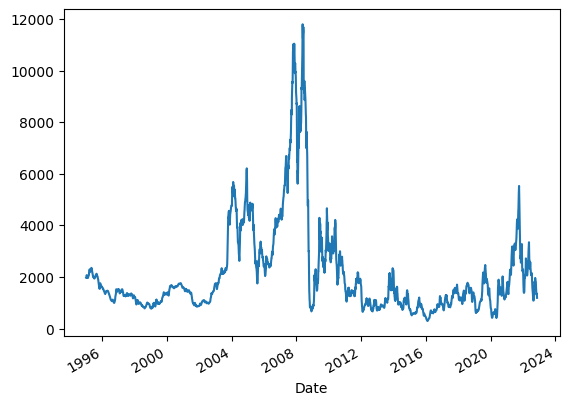

In [256]:
full_daily_df["Price"].plot()